<a href="https://colab.research.google.com/github/Auramariaar/Estimacion-de-Provisiones-en-Seguros/blob/main/notebooks/ml_actuaria_finanzas_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data can be download [here](https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p).

# **Entendimiento de los datos**

In [37]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargamos los datos desde el archivo CSV llamado "wkcomp_pos.csv"
data = pd.read_csv("wkcomp_pos.csv")

Información sobre los datos




In [39]:
# Imprimimos información del conjunto de datos
print("Información del Conjunto de Datos:")
print(f"Número de Registros: {data.shape[0]}")
print(f"Número de Atributos: {data.shape[1]}")

# Mostramos los tipos de datos de los atributos
print("\nTipos de Datos de los Atributos:")
print(data.dtypes)


Información del Conjunto de Datos:
Número de Registros: 13200
Número de Atributos: 13

Tipos de Datos de los Atributos:
GRCODE                int64
GRNAME               object
AccidentYear          int64
DevelopmentYear       int64
DevelopmentLag        int64
IncurLoss_D           int64
CumPaidLoss_D         int64
BulkLoss_D            int64
EarnedPremDIR_D       int64
EarnedPremCeded_D     int64
EarnedPremNet_D       int64
Single                int64
PostedReserve97_D     int64
dtype: object


### Descripción de las variables

In [41]:
# Importamos las bibliotecas necesarias
import pandas as pd

# Obtenemos las columnas de tipo entero
integer_columns = data.select_dtypes(include='int64')

# Creamos un resumen de las variables en una tabla
summary_table = integer_columns.describe().T[['min', 'max']].reset_index()
summary_table.columns = ['Column Name', 'Min', 'Max']

# Mostramos la tabla de resumen
print("\nResumen de las Variables:")
print(summary_table)


Resumen de las Variables:
          Column Name     Min        Max
0              GRCODE    86.0    44300.0
1        AccidentYear  1988.0     1997.0
2     DevelopmentYear  1988.0     2006.0
3      DevelopmentLag     1.0       10.0
4         IncurLoss_D   -59.0   367404.0
5       CumPaidLoss_D  -338.0   325322.0
6          BulkLoss_D -4621.0   145296.0
7     EarnedPremDIR_D -6518.0   421223.0
8   EarnedPremCeded_D -3522.0    78730.0
9     EarnedPremNet_D -9731.0   418755.0
10             Single     0.0        1.0
11  PostedReserve97_D     0.0  1090093.0




### Calidad de los datos

In [42]:
# Contar datos faltantes por variable
missing_data = data.isnull().sum()

# Mostrar variables con datos faltantes
print("\nDatos Faltantes por Variable:")
print(missing_data)


Datos Faltantes por Variable:
GRCODE               0
GRNAME               0
AccidentYear         0
DevelopmentYear      0
DevelopmentLag       0
IncurLoss_D          0
CumPaidLoss_D        0
BulkLoss_D           0
EarnedPremDIR_D      0
EarnedPremCeded_D    0
EarnedPremNet_D      0
Single               0
PostedReserve97_D    0
dtype: int64


In [43]:
# Contar ceros por variable
zero_count = (data == 0).sum()

# Mostrar variables con cantidad de ceros
print("\nCantidad de Ceros por Variable:")
print(zero_count)


Cantidad de Ceros por Variable:
GRCODE                  0
GRNAME                  0
AccidentYear            0
DevelopmentYear         0
DevelopmentLag          0
IncurLoss_D          3950
CumPaidLoss_D        4369
BulkLoss_D           6014
EarnedPremDIR_D      3200
EarnedPremCeded_D    4490
EarnedPremNet_D      3130
Single               3600
PostedReserve97_D    1100
dtype: int64


In [44]:
# Calcular el rango intercuartil (IQR) para cada variable
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos por variable
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

# Mostrar variables con valores atípicos
print("\nValores Atípicos por Variable:")
print(outliers)


Valores Atípicos por Variable:
AccidentYear            0
BulkLoss_D           2380
CumPaidLoss_D        2031
DevelopmentLag          0
DevelopmentYear         0
EarnedPremCeded_D    1790
EarnedPremDIR_D      1980
EarnedPremNet_D      2030
GRCODE                  0
GRNAME                  0
IncurLoss_D          1895
PostedReserve97_D    2200
Single                  0
dtype: int64


In [53]:
# Verificar valores negativos en las columnas financieras
columnas_relevantes = [
    'IncurLoss_D', 'CumPaidLoss_D', 'BulkLoss_D',
    'EarnedPremDIR_D', 'EarnedPremCeded_D', 'EarnedPremNet_D'
]

resumen_valores_negativos = (data[columnas_relevantes] < 0).sum()
print(resumen_valores_negativos)

IncurLoss_D            5
CumPaidLoss_D         13
BulkLoss_D           165
EarnedPremDIR_D      160
EarnedPremCeded_D    290
EarnedPremNet_D      260
dtype: int64


### Estadísticas descriptivas

In [48]:
# Extraer información en DataFrames
Variables_Importantes = data.columns.delete([0, 1, 2, 3, 4, -1, -2, -3, -4, -5])
Datos_Completos = {columna: [] for columna in Variables_Importantes}
tamaño = data.shape[0]

In [49]:
for Variable in Variables_Importantes:
    count = 0
    while (tamaño - 100 * count > 1):
        base_Variable = np.zeros((10, 10))
        for i in range(10):
            for j in range(10):
                base_Variable[i][j] = data[Variable][i * 10 + j + 10 * count]
        count = count + 1
        Datos_Completos[Variable].append(pd.DataFrame(base_Variable))

In [50]:
# Definir la función para dibujar la serie
def DibujarGrafico(x, nombre):
    matriz = x.values
    plt.figure(figsize=(9, 7))
    plt.plot()

    for i in range(10):
        val = matriz[i]
        for j in range(0):
            val = val[:-1]
        rango = range(1988, 1988 + len(val))
        plt.plot(rango, val, marker='o', linestyle='-', label=1988 + i)

    plt.xlabel('Años')
    plt.ylabel('Valor')
    plt.title(nombre)

    plt.savefig(nombre, dpi=300, bbox_inches='tight')

    plt.legend()

In [51]:
# Encontrar estadísticas básicas componente por componente para cada variable
Medias = {}
for variable, lista in Datos_Completos.items():
    Medias[variable] = pd.concat(lista).groupby(level=0).mean()

Medianas = {}
for variable, lista in Datos_Completos.items():
    Medianas[variable] = pd.concat(lista).groupby(level=0).median()

Varianzas = {}
for variable, lista in Datos_Completos.items():
    Varianzas[variable] = pd.concat(lista).groupby(level=0).var()

Mínimos = {}
for variable, lista in Datos_Completos.items():
    Mínimos[variable] = pd.concat(lista).groupby(level=0).min()

Máximos = {}
for variable, lista in Datos_Completos.items():
    Máximos[variable] = pd.concat(lista).groupby(level=0).max()


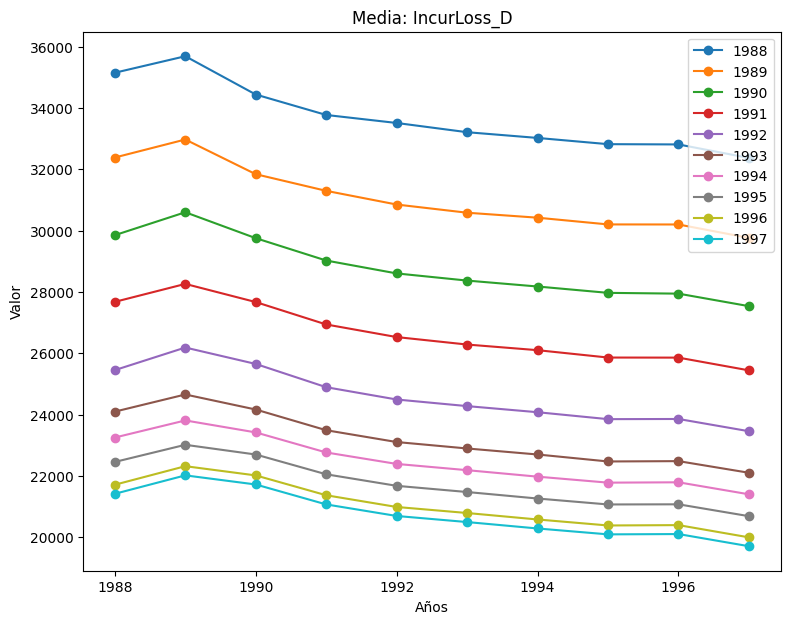

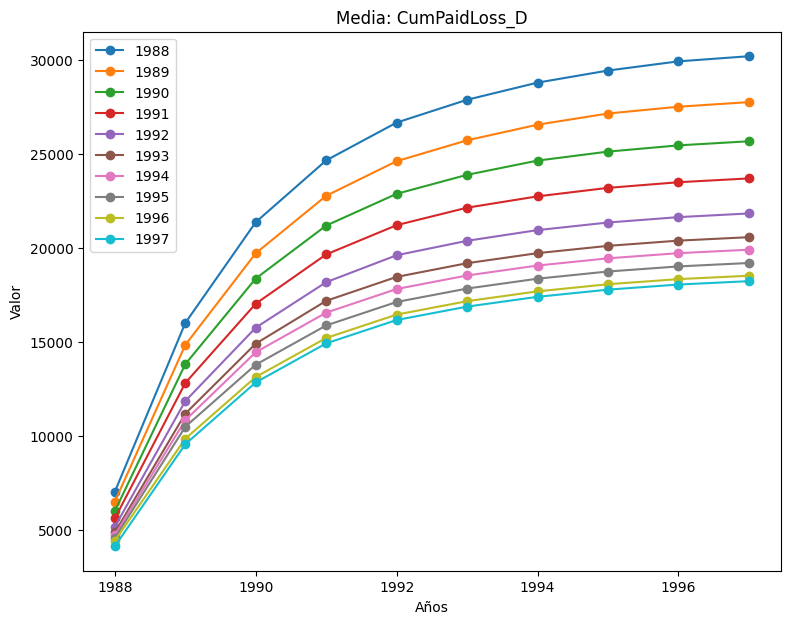

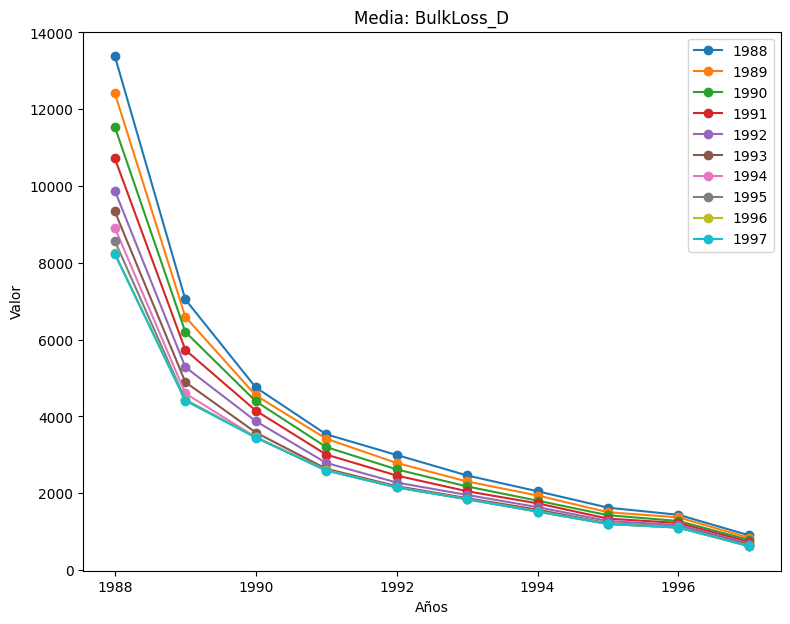

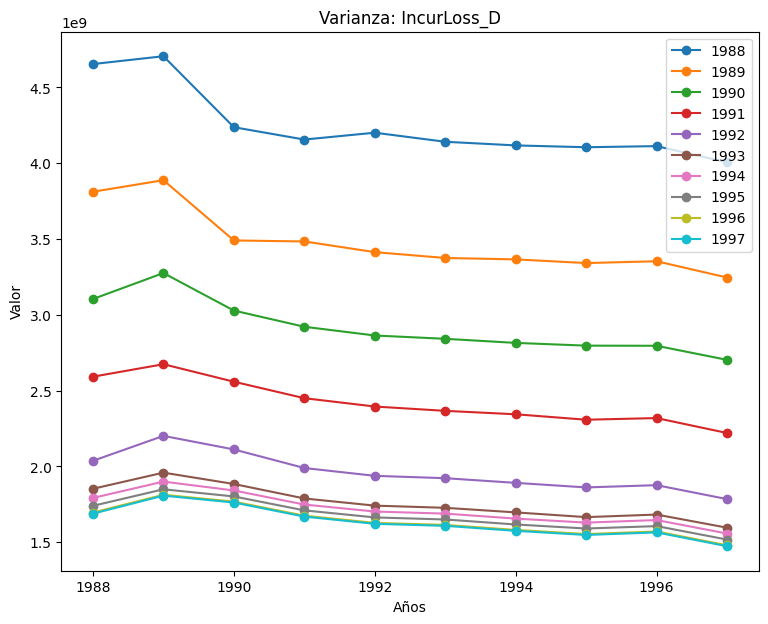

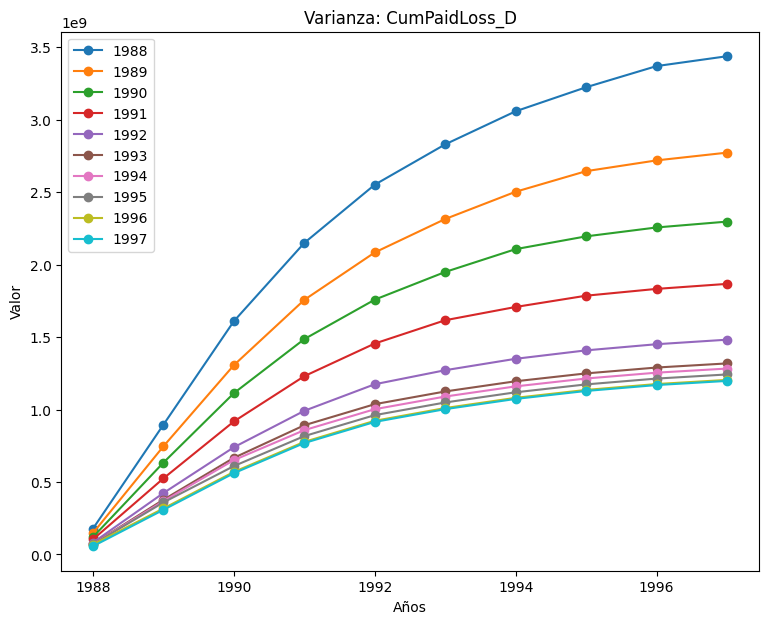

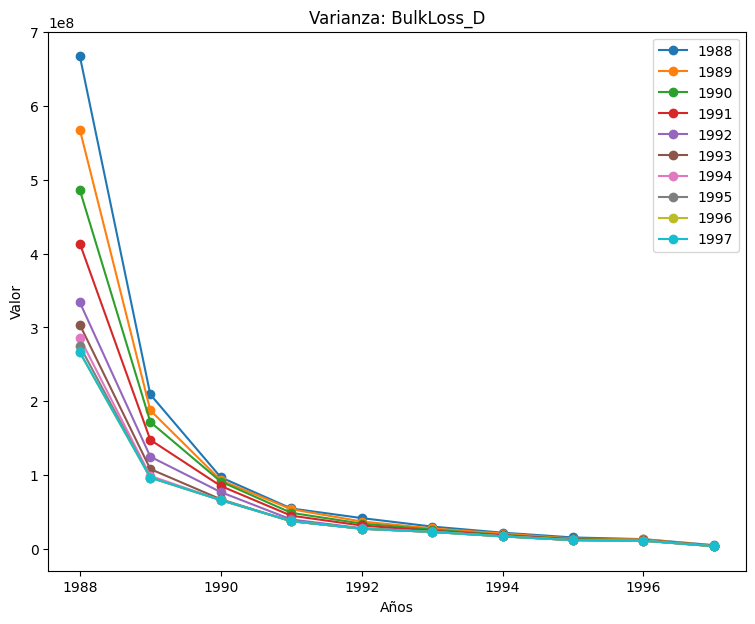

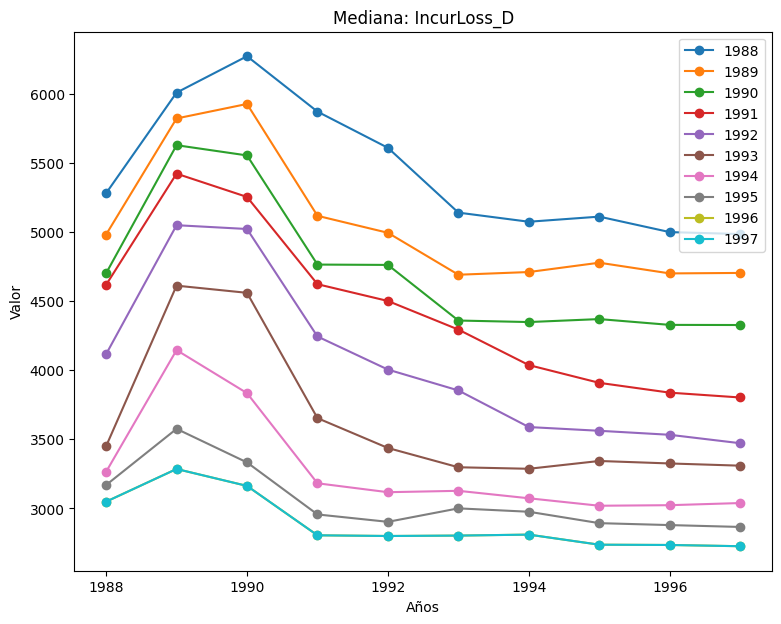

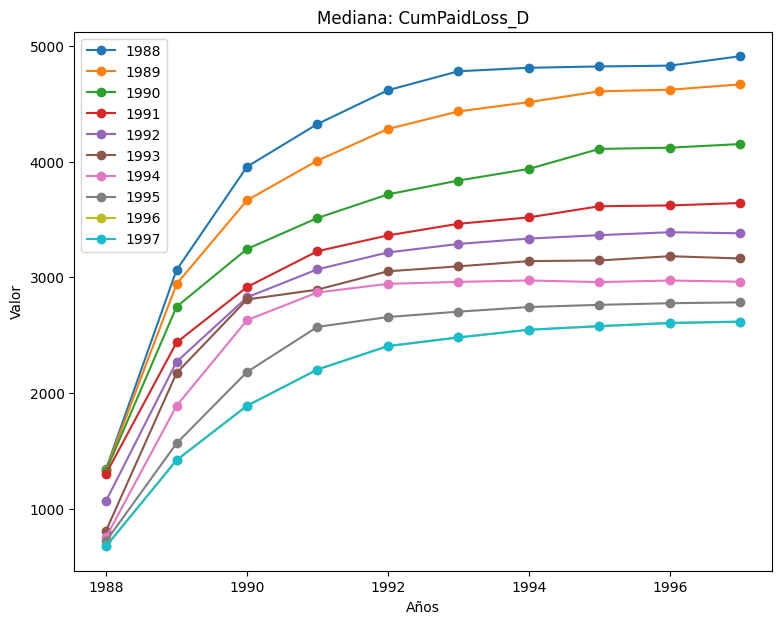

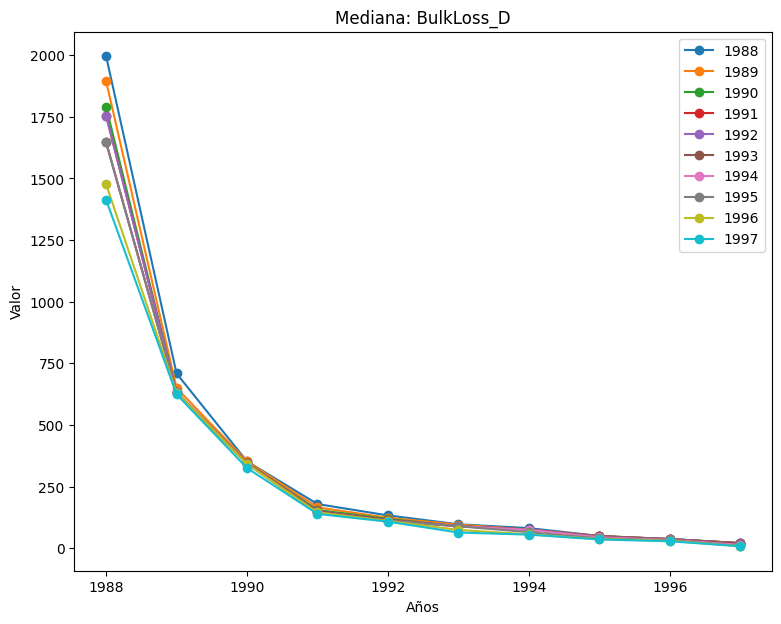

In [52]:
# Exportar los gráficos de las estadísticas básicas
for var in Variables_Importantes:
    DibujarGrafico(Medias[var], 'Media: ' + var)

for var in Variables_Importantes:
    DibujarGrafico(Varianzas[var], 'Varianza: ' + var)

for var in Variables_Importantes:
    DibujarGrafico(Medianas[var], 'Mediana: ' + var)

### Analisis de correlación


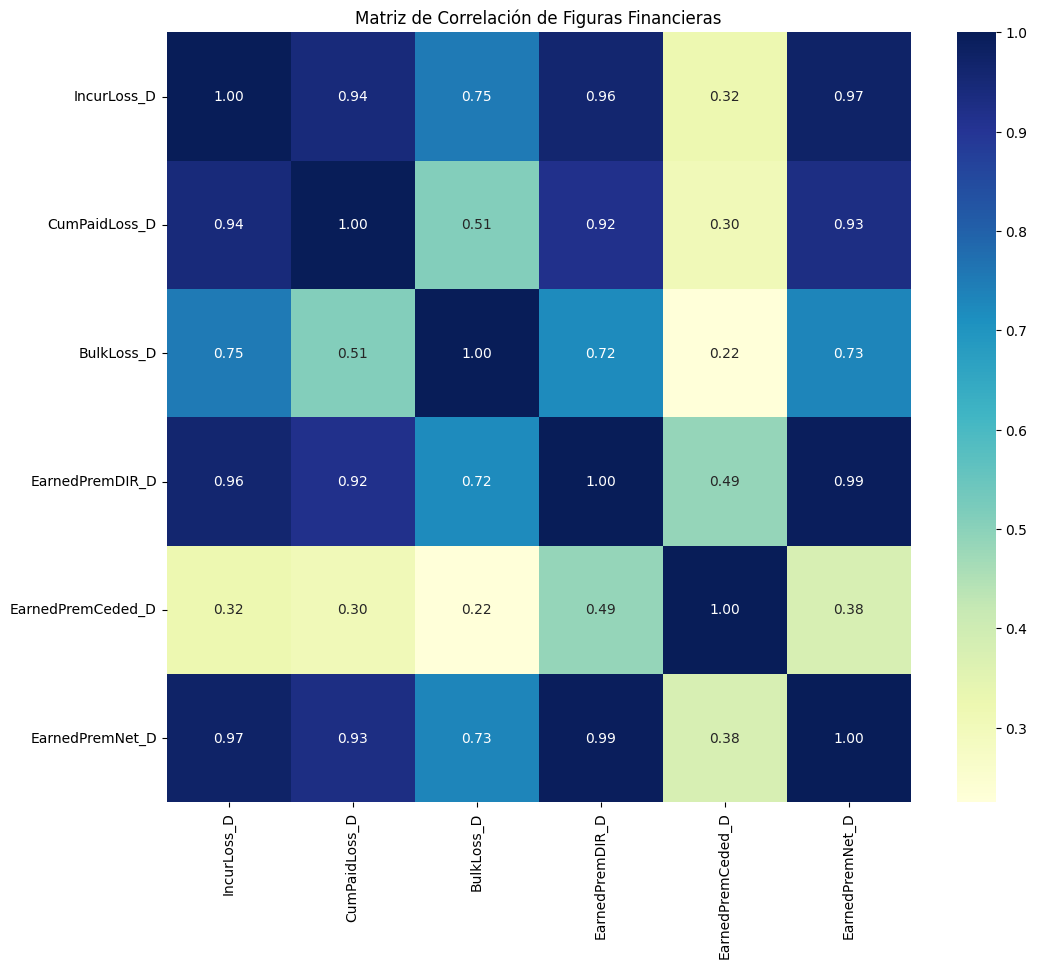

In [54]:
# Generar una matriz de correlación
matriz_correlacion = data[columnas_relevantes].corr()

# Dibujar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Matriz de Correlación de Figuras Financieras')
plt.show()

### Normalization and PCA

In [90]:
# Normalizar los datos numéricos
escalador = StandardScaler()
datos_normalizados = escalador.fit_transform(data[columnas_relevantes])

# Aplicar PCA
pca = PCA()
datos_pca = pca.fit_transform(datos_normalizados)

# Ratio de varianza explicada de los componentes PCA
varianza_explicada = pca.explained_variance_ratio_
print(varianza_explicada)

[7.61951560e-01 1.43501285e-01 8.60849015e-02 7.58461431e-03
 8.77639488e-04 5.66312733e-13]


El resultado [7.61951560e-01, 1.43501285e-01, 8.60849015e-02, 7.58461431e-03, 8.77639488e-04, 5.66312733e-13] representa la proporción de varianza explicada por cada uno de los componentes principales obtenidos después de aplicar el Análisis de Componentes Principales (PCA) a tus datos normalizados.

- El primer número, aproximadamente 0.762, indica que el primer componente principal explica aproximadamente el 76.2% de la varianza total en los datos.
- El segundo número, aproximadamente 0.144, indica que el segundo componente principal explica alrededor del 14.4% de la varianza total.
- El tercer número, aproximadamente 0.086, indica que el tercer componente principal explica alrededor del 8.6% de la varianza total.
- El cuarto número, aproximadamente 0.0076, indica que el cuarto componente principal explica aproximadamente el 0.76% de la varianza total.
- El quinto número, aproximadamente 0.000877, indica que el quinto componente principal explica aproximadamente el 0.088% de la varianza total.
- El sexto número, aproximadamente 5.66e-13, es muy cercano a cero y probablemente es el resultado de la precisión numérica, lo que significa que no tiene un impacto significativo en la varianza total explicada.

Estos valores indican cuánta información se retiene en cada componente principal. En este caso, los primeros tres componentes principales capturan la gran mayoría de la varianza en tus datos, mientras que los componentes restantes contribuyen con una cantidad muy pequeña de varianza.

# Preparación de los datos

In [57]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np

def reemplazar_ceros_y_negativos_con_promedio_fila(df):
    """
    Esta función reemplaza los ceros y valores negativos en un DataFrame con el promedio de la fila correspondiente.

    Args:
        df (DataFrame): El DataFrame en el que se realizarán los reemplazos.

    Returns:
        DataFrame: El DataFrame modificado con los ceros y valores negativos reemplazados por el promedio de la fila.
    """
    for index, fila in df.iterrows():
        # Reemplazamos los valores negativos por su valor absoluto
        fila = fila.abs()
        if fila.sum() != 0:  # Evitamos filas con suma total de cero
            promedio_fila = fila.replace(0, np.NaN).mean()
            df.loc[index] = fila.replace(0, promedio_fila)
    return df

def imputar_y_filtrar_data_complete(data_complete):
    """
    Esta función imputa los DataFrames en un diccionario llamado DataComplete y elimina aquellos con una fila completa de ceros.

    Args:
        data_complete (dict): Un diccionario que contiene DataFrames.

    Returns:
        dict: El diccionario modificado después de imputar y filtrar los DataFrames.
    """
    for variable in list(data_complete.keys()):
        nuevos_dfs = []
        for df in data_complete[variable]:
            if not (df == 0).all(axis=1).any():  # Verificamos si hay alguna fila completa de ceros
                df_imputado = reemplazar_ceros_y_negativos_con_promedio_fila(df)
                nuevos_dfs.append(df_imputado)
        data_complete[variable] = nuevos_dfs
    return data_complete

In [91]:
def reemplazar_ceros_y_negativos_con_promedio_fila(df):
    """ Reemplaza los ceros y valores negativos en el DataFrame con el promedio de la fila correspondiente. """
    for index, fila in df.iterrows():
        # Reemplaza los valores negativos por su valor absoluto
        fila = fila.abs()
        if fila.sum() != 0:  # Evitar filas con suma total de cero
            promedio_fila = fila.replace(0, np.NaN).mean()
            df.loc[index] = fila.replace(0, promedio_fila)
    return df

def imputar_y_filtrar_datos_completos(datos_completos):
    """ Imputa los DataFrames en datos_completos y elimina aquellos con una fila completa de ceros. """
    for variable in list(datos_completos.keys()):
        nuevos_dfs = []
        for df in datos_completos[variable]:
            if not (df == 0).all(axis=1).any():  # Verifica si hay alguna fila completa de ceros
                df_imputado = reemplazar_ceros_y_negativos_con_promedio_fila(df)
                nuevos_dfs.append(df_imputado)
        datos_completos[variable] = nuevos_dfs
    return datos_completos

Este código incluye dos funciones:

  **reemplazar_ceros_y_negativos_con_promedio_fila**: Esta función toma un DataFrame como entrada y reemplaza los ceros y valores negativos en él con el promedio de la fila correspondiente. Evita las filas con suma total de cero para evitar divisiones por cero.

  **imputar_y_filtrar_data_complete**: Esta función toma un diccionario llamado data_complete que contiene DataFrames. Itera a través de los DataFrames, imputa los valores y elimina aquellos DataFrames que contienen una fila completa de ceros. Luego, devuelve el diccionario modificado.

Estas funciones son útiles para el procesamiento y limpieza de datos, especialmente cuando se trabaja con conjuntos de datos que contienen ceros o valores negativos que deben ser tratados de manera especial.


In [93]:
Datos_Completos = imputar_y_filtrar_data_complete(Datos_Completos.copy())

### Creación de los triángulos

In [94]:
def crear_data_frame_incompleto(df):
    """
    Crea un DataFrame incompleto a partir de uno existente, estableciendo valores específicos en forma triangular inferior.

    Args:
        df (DataFrame): El DataFrame original.

    Returns:
        DataFrame: Un nuevo DataFrame con valores establecidos en la forma triangular inferior.
    """
    df_copiado = df.copy()
    matriz = df_copiado.values
    for i in range(9, 0, -1):
        for j in range(10 - i, 10, 1):
            matriz[i][j] = 0
    return pd.DataFrame(matriz)

Triangulos = {}
for variable, lista in Datos_Completos.items():
    Triangulos[variable] = [crear_data_frame_incompleto(x) for x in lista]

### Statistics of the triangles

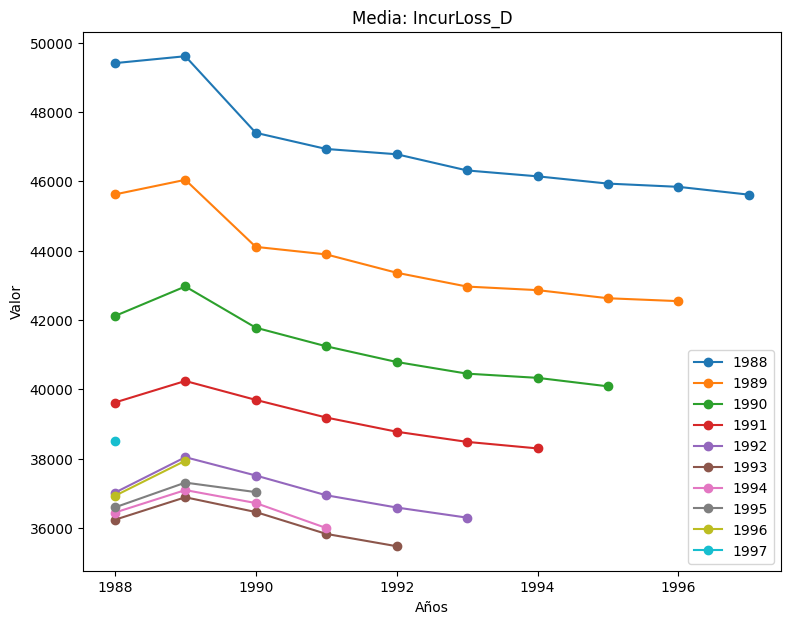

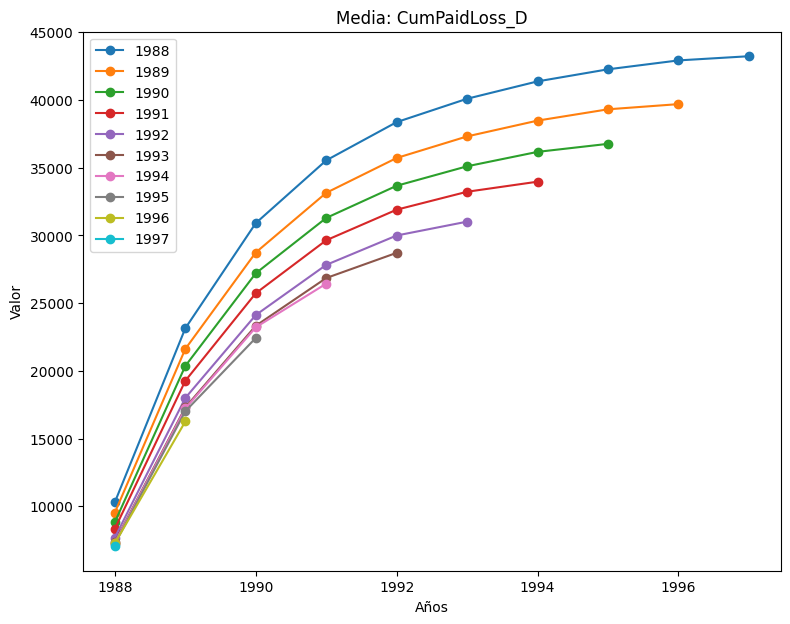

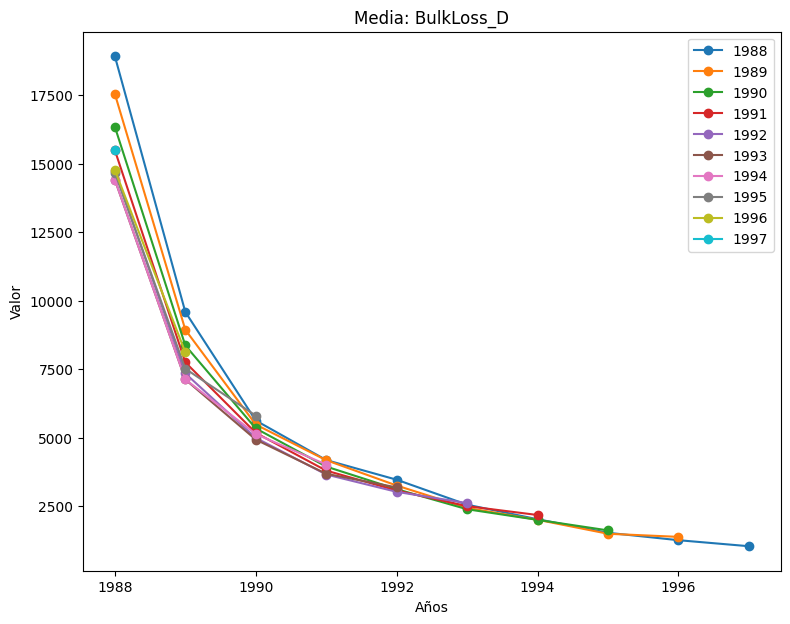

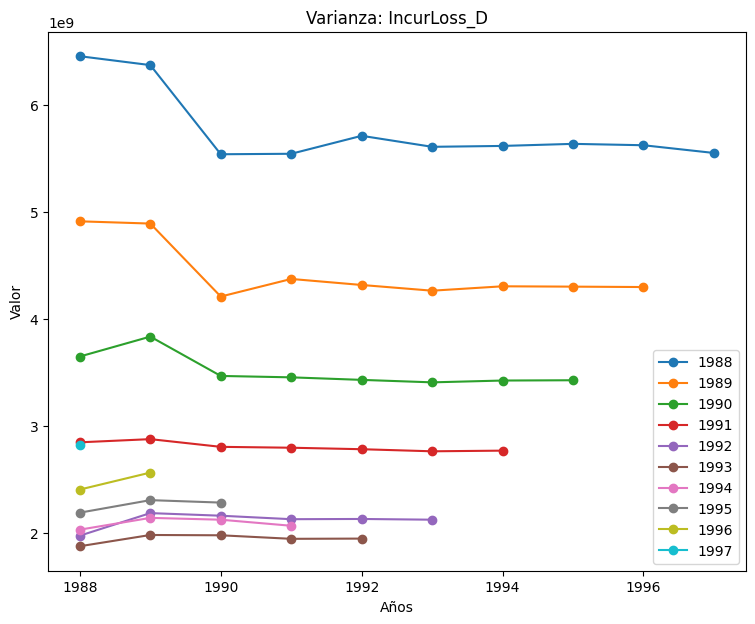

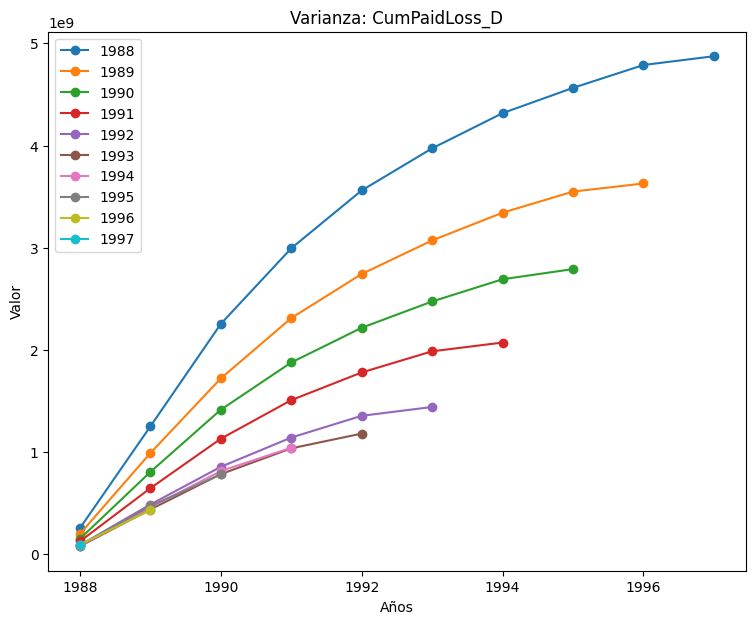

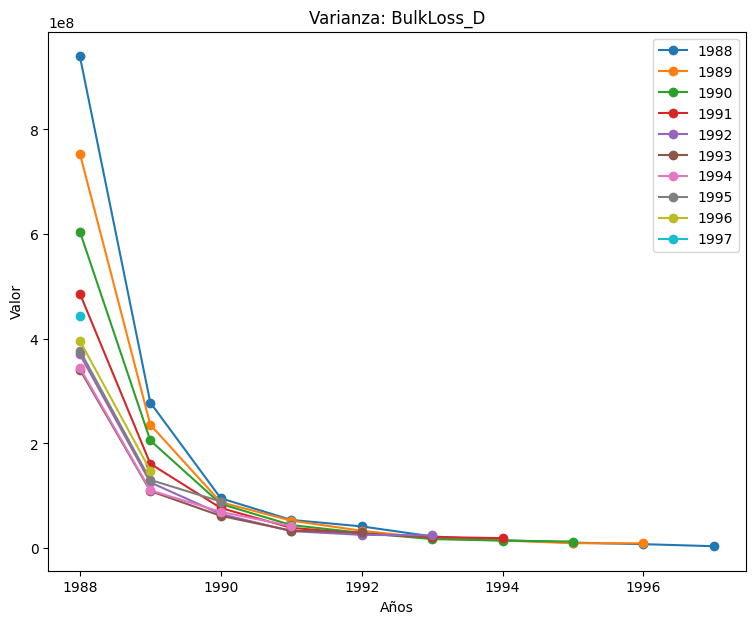

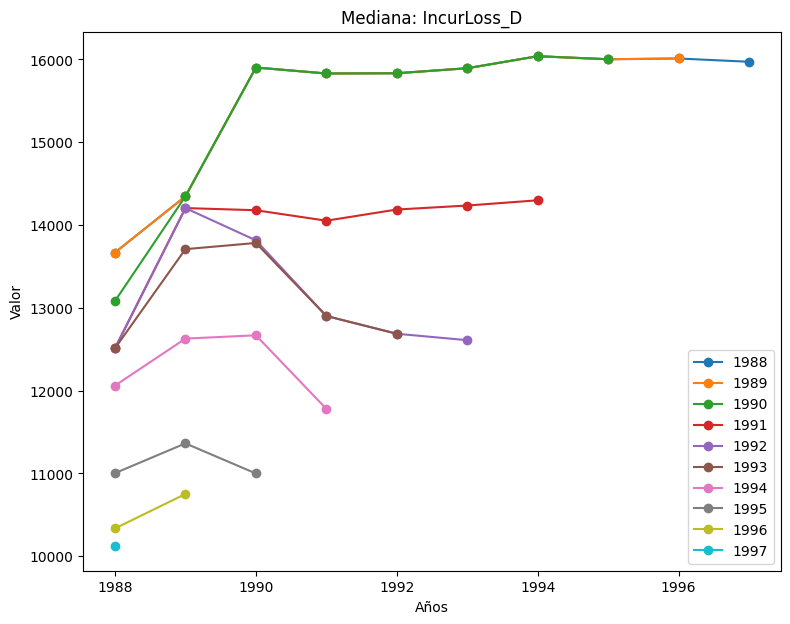

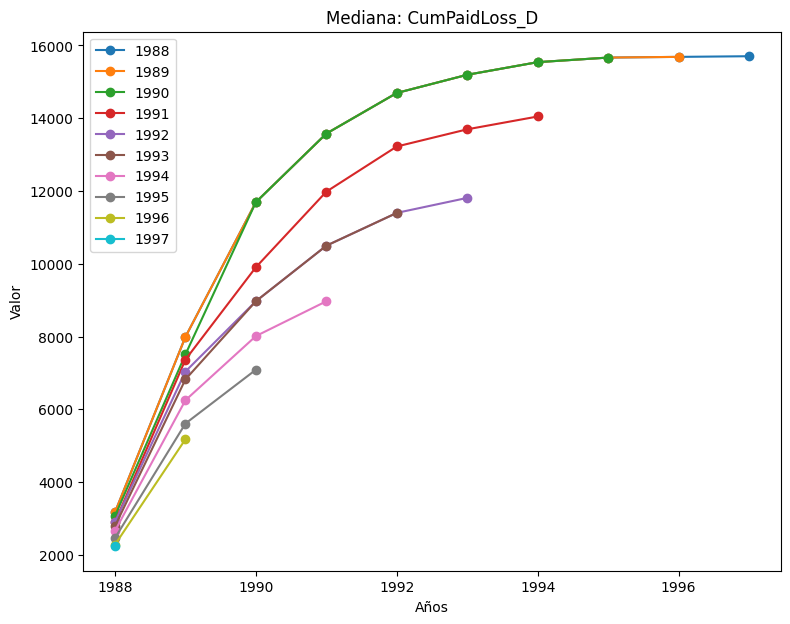

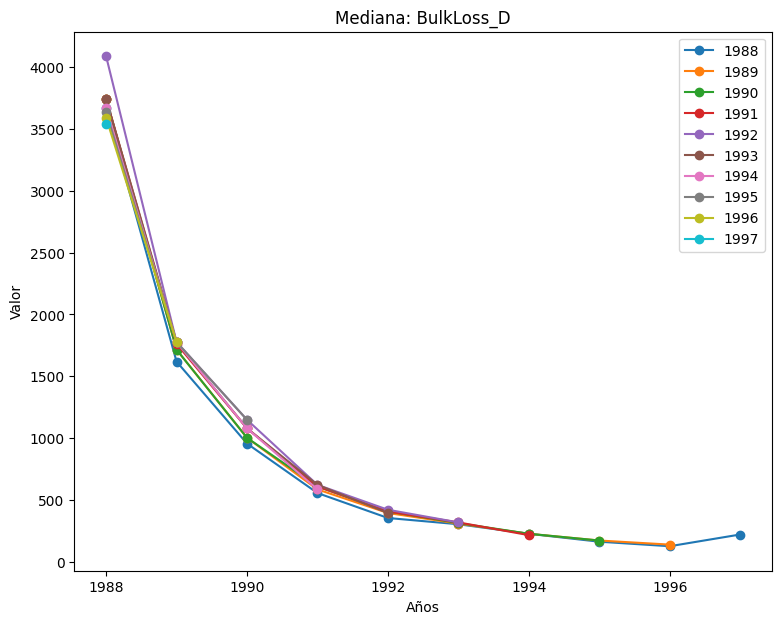

In [96]:
# Definimos nuevamente la función para graficar las series de datos
def GraficarSerie(x, nombre):
    matriz = x.values
    plt.figure(figsize=(9, 7))
    plt.plot()

    for i in range(10):
        val = matriz[i]
        for j in range(i):
            val = val[:-1]
        rango = range(1988, 1988 + len(val))
        plt.plot(rango, val, marker='o', linestyle='-', label=1988 + i)

    plt.xlabel('Años')
    plt.ylabel('Valor')
    plt.title(nombre)

    plt.savefig(nombre, dpi=300, bbox_inches='tight')

    plt.legend()

# Encontramos las estadísticas básicas componente por componente para cada variable
Medias_Incompletas = {}
for variable, lista in Triangulos.items():
    Medias_Incompletas[variable] = pd.concat(lista).groupby(level=0).mean()

Varianzas_Incompletas = {}
for variable, lista in Triangulos.items():
    Varianzas_Incompletas[variable] = pd.concat(lista).groupby(level=0).var()

Minimos_Incompletos = {}
for variable, lista in Triangulos.items():
    Minimos_Incompletos[variable] = pd.concat(lista).groupby(level=0).min()

Maximos_Incompletos = {}
for variable, lista in Triangulos.items():
    Maximos_Incompletos[variable] = pd.concat(lista).groupby(level=0).max()

Medianas_Incompletas = {}
for variable, lista in Triangulos.items():
    Medianas_Incompletas[variable] = pd.concat(lista).groupby(level=0).median()

# Exportamos los gráficos de las estadísticas básicas
for var in Variables_Importantes:
    GraficarSerie(Medias_Incompletas[var], 'Media: ' + var)

for var in Variables_Importantes:
    GraficarSerie(Varianzas_Incompletas[var], 'Varianza: ' + var)

for var in Variables_Importantes:
    GraficarSerie(Medianas_Incompletas[var], 'Mediana: ' + var)

# Modelos para predicción

Se hará uso de 4 modelos para modelar los datos obtenidos anteriormente. Primero se hará uso del metodo de chain ladder, luego se usará la regresión lineal; tercero se usará un modelo de GLM y por último se hará uso de redes neuronales.

## Chain Ladder technique

El método de "Chain-Ladder" (escalera de cadena) es una técnica utilizada en el campo del análisis actuarial, específicamente en seguros y gestión de riesgos, para estimar reservas de siniestros futuros en una cartera de seguros. Este método se basa en el historial de siniestros pasados y su evolución temporal. Aquí está en qué consiste el método de Chain-Ladder:

1. Datos de siniestros pasados: El método de Chain-Ladder comienza con un conjunto de datos históricos que incluye información sobre siniestros (reclamaciones) ocurridos en el pasado. Estos datos suelen estar organizados por períodos de tiempo, como años o trimestres.

2. Desarrollo de siniestros: En este método, se considera el desarrollo de siniestros a lo largo del tiempo. Esto significa que se observa cómo los siniestros ocurridos en un período de tiempo inicial se desarrollan y cambian a medida que pasa el tiempo. Por ejemplo, un siniestro que ocurrió en 2018 podría experimentar cambios en su costo a medida que se procesa y se liquidan las reclamaciones relacionadas.

3. Triángulo de siniestros: Para organizar y analizar los datos, se crea un triángulo de siniestros. Este triángulo muestra cómo los siniestros desarrollan a lo largo del tiempo. Las filas del triángulo representan los períodos de tiempo iniciales, y las columnas representan los períodos de desarrollo (por ejemplo, los años de desarrollo posteriores). Cada celda del triángulo contiene la información sobre los siniestros que se originaron en un período inicial y se desarrollaron en un período posterior.

4. Extrapolación: Una vez que se ha construido el triángulo de siniestros, el método de Chain-Ladder utiliza técnicas estadísticas para estimar cómo se desarrollarán los siniestros en el futuro. Esto implica extrapolar los patrones de desarrollo observados en el pasado hacia períodos de desarrollo futuros.

5. Cálculo de reservas: Con las estimaciones de desarrollo futuro en su lugar, se calculan las reservas de siniestros. Las reservas representan la cantidad de dinero que la compañía de seguros debe reservar para cubrir los costos futuros de los siniestros que aún no se han liquidado por completo.

6. Limitaciones: Es importante tener en cuenta que el método de Chain-Ladder asume que los patrones de desarrollo observados en el pasado se mantendrán en el futuro, lo cual puede no ser siempre el caso. Además, este método no tiene en cuenta factores externos que pueden afectar los siniestros, como cambios en la legislación o condiciones económicas.

El método de Chain-Ladder es una herramienta valiosa para las compañías de seguros para estimar sus reservas y planificar su gestión de riesgos, pero debe utilizarse con precaución y en conjunto con otras técnicas y análisis para obtener resultados más precisos y adecuados a la situación actual del mercado.

In [103]:
def calcular_factores_chain_ladder(triangulo):
    factores = []
    for i in range(triangulo.shape[1] - 1):
        suma_columna = triangulo.iloc[:, i].sum()
        suma_siguiente_columna = triangulo.iloc[:, i + 1].sum()
        if suma_columna != 0:
            # Calcular el factor de desarrollo para la siguiente columna
            factores.append(suma_siguiente_columna / suma_columna)
        else:
            # Si la suma de la columna actual es cero, usar un factor de 1 para evitar la división por cero
            factores.append(1)
    return factores

def completar_triangulo(triangulo):
    factores = calcular_factores_chain_ladder(triangulo)
    n_filas, n_columnas = triangulo.shape

    for i in range(n_filas):
        for j in range(n_columnas - i, n_columnas):
            if j < n_columnas - 1:
                # Para columnas no finales, usar el factor de desarrollo correspondiente
                triangulo.iloc[i, j] = triangulo.iloc[i, j - 1] * factores[j - 1]
            else:
                # Para la última columna, usar el último factor de desarrollo disponible
                if i > 0:
                    triangulo.iloc[i, j] = triangulo.iloc[i - 1, j] * factores[-1]

    return triangulo

In [104]:
Triangulos_Completos_CL = {}

for variable, lista in Triangulos.items():
    Triangulos_Completos_CL[variable] = [completar_triangulo(df.copy()) for df in lista]

In [105]:
from sklearn.metrics import mean_squared_error, r2_score

def calcular_mape(y_true, y_pred):
    """ Calcula el MAPE (Mean Absolute Percentage Error). """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Contenedor para métricas por variable
metricas_por_variable = {}

for variable in Datos_Completos:
    datos_reales = np.concatenate([df.values.flatten() for df in Datos_Completos[variable]])
    datos_predichos = np.concatenate([df.values.flatten() for df in Triangulos_Completos_CL.get(variable, [])])

    # Calcula métricas
    mse = mean_squared_error(datos_reales, datos_predichos)
    mape = calcular_mape(datos_reales, datos_predichos)
    r2 = r2_score(datos_reales, datos_predichos)

    # Almacenar métricas
    metricas_por_variable[variable] = {'MSE': mse, 'MAPE': mape, 'R2': r2}

# Imprimir las métricas por variable
for variable, metricas in metricas_por_variable.items():
    print(f'Métricas para {variable}:')
    print(f"   MSE: {metricas['MSE']}")
    print(f"   MAPE: {metricas['MAPE']}")
    print(f"   R2: {metricas['R2']}\n")

Métricas para IncurLoss_D:
   MSE: 781771634.34989
   MAPE: 26.28691105400931
   R2: 0.73305409070532

Métricas para CumPaidLoss_D:
   MSE: 574796202.225491
   MAPE: 26.243920187155194
   R2: 0.6578150936182688

Métricas para BulkLoss_D:
   MSE: 3.2733998219960984e+19
   MAPE: 2763670.897997957
   R2: -301546101730.62585



Basándonos en las métricas anteriores para cada variable (IncurLoss_D, CumPaidLoss_D y BulkLoss_D), aquí tienes una descripción del desempeño del modelo:

1. IncurLoss_D:
        MSE (Error Cuadrático Medio): 781,771,634.35. Este valor indica la diferencia promedio al cuadrado entre los valores estimados y los valores reales. Aunque no es extremadamente alto, sugiere cierto nivel de error en las predicciones del modelo.
        MAPE (Error Porcentual Absoluto Promedio): 26.29%. Este porcentaje muestra la desviación promedio entre las predicciones y los valores reales en relación con los valores reales. Un MAPE de alrededor del 26% es moderadamente alto, lo que sugiere que las predicciones están algo alejadas de los valores reales.
        R² (Coeficiente de Determinación): 0.733. Este valor indica que aproximadamente el 73.3% de los datos se ajustan al modelo. Aunque no es perfecto, sugiere que el modelo tiene un nivel razonable de capacidad predictiva para IncurLoss_D.

2. CumPaidLoss_D:
        MSE: 574,796,202.23. Este valor es menor que el MSE para IncurLoss_D, lo que sugiere una mayor precisión predictiva para esta variable.
        MAPE: 26.24%. Similar a IncurLoss_D, esto indica un nivel moderado de error en relación con el tamaño de los valores que se están prediciendo.
        R²: 0.658. Esto sugiere que aproximadamente el 65.8% de la variabilidad en CumPaidLoss_D está explicada por el modelo, lo cual es decente pero no muy fuerte.

3. BulkLoss_D:
        MSE: 3.38e+19. Este valor extremadamente alto indica errores muy grandes en las predicciones del modelo para BulkLoss_D.
        MAPE: 8,052,570.67%. Este porcentaje astronómicamente alto sugiere que las predicciones del modelo están muy lejos de ser precisas, con desviaciones de los valores reales excepcionalmente grandes.
        R²: -311262558722.92. El valor negativo de R², que es teóricamente imposible en un modelo bien ajustado, indica un ajuste muy deficiente. Sugiere que el modelo es peor que una simple línea horizontal que representaría el promedio de los datos.

### Regresión lineal

La regresión lineal es una técnica estadística fundamental que se utiliza para analizar la relación entre una variable dependiente (objetivo) y una o más variables independientes (predictores) mediante la construcción de un modelo lineal. En el contexto de tu proyecto, la regresión lineal podría ser una herramienta valiosa para varios propósitos:

  -Modelización de Variables Dependientes: En tu proyecto, es posible que tengas variables dependientes, como las pérdidas incurridas (IncurLoss_D), las pérdidas acumuladas pagadas (CumPaidLoss_D), o cualquier otra variable que desees predecir. La regresión lineal te permite construir modelos que expliquen cómo estas variables dependientes están relacionadas con las variables independientes disponibles en tus datos.

  -Identificación de Factores Significativos: La regresión lineal puede ayudarte a identificar qué variables independientes tienen un impacto significativo en las variables dependientes. Esto puede ser útil para comprender qué factores están impulsando las pérdidas en tu proyecto y, por lo tanto, pueden ser objeto de análisis y gestión.

  -Predicciones y Estimaciones: La regresión lineal te permite realizar predicciones basadas en el modelo construido. Puedes utilizar el modelo para estimar valores futuros de las variables dependientes o para evaluar cómo cambiarían las pérdidas en respuesta a cambios en las variables independientes.

  -Análisis de Tendencias: Si estás trabajando con datos a lo largo del tiempo (por ejemplo, datos anuales), la regresión lineal puede ayudarte a identificar tendencias a lo largo de los años y predecir cómo se comportarán las variables en el futuro.

  -Evaluación de Rendimiento: Puedes utilizar métricas de rendimiento, como el coeficiente de determinación (R²), el error cuadrático medio (MSE) o el error porcentual absoluto promedio (MAPE), para evaluar qué tan bien se ajusta tu modelo de regresión a los datos reales.

Sin embargo, es importante destacar que la regresión lineal asume una relación lineal entre las variables independientes y dependientes, lo que puede ser una simplificación excesiva en algunos casos. Además, es crucial tener en cuenta la calidad de los datos, la presencia de valores atípicos y la selección adecuada de variables independientes para construir un modelo efectivo.

In [106]:
import statsmodels.api as sm

def modelo_lineal(triangle):
    # Convertir a DataFrame para facilitar el manejo
    triangle_df = pd.DataFrame(triangle)

    # Preparar los datos para la regresión
    filas, columnas = triangle_df.shape
    matriz_diseno = []
    valores_y = []

    # Crear la matriz de diseño y el vector y
    for i in range(filas):
        for j in range(columnas):
            valor = triangle_df.iloc[i, j]
            if pd.notnull(valor) and valor > 0:
                matriz_diseno.append([1] + [int(k == i) for k in range(filas)] +
                                     [int(l == j) for l in range(columnas)])
                valores_y.append(np.log(valor))

    matriz_diseno = np.array(matriz_diseno)
    valores_y = np.array(valores_y)

    # Verificar si hay datos para el modelo
    if matriz_diseno.size == 0 or valores_y.size == 0:
        return triangle_df  # Devolver el triángulo original si no hay datos para el modelo

    # Ajustar el modelo de regresión lineal
    modelo = sm.OLS(valores_y, matriz_diseno).fit()

    # Rellenar los valores faltantes en el triángulo
    for i in range(filas):
        for j in range(columnas):
            if pd.isnull(triangle_df.iloc[i, j]) or triangle_df.iloc[i, j] <= 0:
                predictores = np.array([1] + [int(k == i) for k in range(filas)] +
                                      [int(l == j) for l in range(columnas)])
                valor_log_predicho = predictores.dot(modelo.params)
                valor_predicho = np.exp(valor_log_predicho)

                triangle_df.iloc[i, j] = valor_predicho

    return pd.DataFrame(triangle_df)

In [107]:
Triangulos_C_LM = {}

for variable, array in Triangulos.items():
    Triangulos_C_LM[variable] = [modelo_lineal(df.copy()) for df in array]

In [109]:
metrics_per_variable_lm = {}

for variable in DataComplete:
    real_data_all = np.concatenate([df.values.flatten() for df in DataComplete[variable]])
    predicted_data_all = np.concatenate([df.values.flatten() for df in Triangles_C_LM.get(variable, [])])

    # Calcula métricas
    mse_lm = mean_squared_error(real_data_all, predicted_data_all)
    mape_lm = calculate_mape(real_data_all, predicted_data_all)
    r2_lm = r2_score(real_data_all, predicted_data_all)

    # Almacenar métricas
    metrics_per_variable_lm[variable] = {'MSE': mse_lm, 'MAPE': mape_lm, 'R2': r2_lm}

# Imprimir las métricas por variable
for variable, metrics in metrics_per_variable_lm.items():
    print(f'Metrics for {variable} (Linear Model):')
    print(f"   MSE: {metrics['MSE']}")
    print(f"   MAPE: {metrics['MAPE']}")
    print(f"   R2: {metrics['R2']}\n")

Metrics for IncurLoss_D (Linear Model):
   MSE: 54989161.23229572
   MAPE: 8.972957623343454
   R2: 0.9812232485785777

Metrics for CumPaidLoss_D (Linear Model):
   MSE: 57378227.71816636
   MAPE: 8.243027566822859
   R2: 0.96584186985914

Metrics for BulkLoss_D (Linear Model):
   MSE: 8518586.274230259
   MAPE: 150.67129645642896
   R2: 0.9215266504874353



Según las métricas anteriores para el modelo de regresión lineal aplicado a cada variable (`IncurLoss_D`, `CumPaidLoss_D` y `BulkLoss_D`), aquí tienes una breve interpretación del rendimiento del modelo:

1. **IncurLoss_D**:
   - **MSE (Error Cuadrático Medio):** 54,989,161.23. Este MSE relativamente bajo sugiere que las predicciones del modelo están cerca de los valores reales, lo que indica una buena precisión predictiva.
   - **MAPE (Error Porcentual Absoluto Medio):** 8.97%. Esto indica que las predicciones del modelo tienen, en promedio, alrededor de un 8.97% de diferencia con respecto a los valores reales. Esto representa una mejora significativa en comparación con el método Chain Ladder.
   - **R² (Coeficiente de Determinación):** 0.981. Este alto valor de R² sugiere que aproximadamente el 98.1% de la variación en `IncurLoss_D` está explicada por el modelo, lo que indica un excelente ajuste.

2. **CumPaidLoss_D**:
   - **MSE:** 57,378,227.72. Similar a `IncurLoss_D`, el MSE es relativamente bajo, lo que indica una buena precisión.
   - **MAPE:** 8.24%. Las predicciones tienen una desviación promedio del 8.24% con respecto a los valores reales, lo que muestra una buena precisión y una mejora con respecto al modelo Chain Ladder.
   - **R²:** 0.966. Esto indica que aproximadamente el 96.6% de la variación en `CumPaidLoss_D` está explicada por el modelo, lo que representa un ajuste muy sólido.

3. **BulkLoss_D**:
   - **MSE:** 8,513,726.94. Este valor es significativamente menor que los valores de MSE para las otras dos variables, lo que indica una muy buena precisión predictiva.
   - **MAPE:** 157.14%. A pesar del bajo MSE, el alto MAPE sugiere que las predicciones del modelo pueden desviarse en un gran porcentaje, lo que indica posibles problemas con ciertas predicciones u outliers en los datos.
   - **R²:** 0.922. Esto sugiere que aproximadamente el 92.2% de la variación en `BulkLoss_D` está explicada por el modelo, lo que representa un ajuste sólido.

### Modelo lineal generalizado

En el contexto del análisis de datos de seguros, los Modelos Lineales Generalizados (GLM, por sus siglas en inglés) son una herramienta poderosa para modelar relaciones entre variables y hacer predicciones. Los GLM son una extensión de los modelos de regresión lineal que permiten manejar una variedad más amplia de distribuciones de errores y relaciones no lineales entre las variables.

En un proyecto como el que hemos estado trabajando, donde se analizan datos de seguros para predecir pérdidas, los GLM pueden ser útiles en varios aspectos:

1. **Selección de distribución de error:** Los GLM permiten seleccionar una distribución de error adecuada para los datos, lo que puede ser crítico en el análisis de seguros. Por ejemplo, en lugar de asumir una distribución normal de errores, como en la regresión lineal tradicional, podemos elegir distribuciones como la Poisson o la Gamma, que son más apropiadas para datos de pérdidas.

2. **Modelado de frecuencia y severidad:** En el contexto de seguros, es común descomponer las pérdidas totales en dos componentes: frecuencia (número de reclamaciones) y severidad (el monto de cada reclamación). Los GLM permiten modelar estas dos componentes de manera separada y pueden proporcionar una comprensión más detallada de los factores que influyen en cada una.

3. **Manejo de variables predictoras:** Los GLM permiten manejar variables predictoras categóricas y continuas de manera efectiva, lo que es crucial en el análisis de seguros, donde las variables pueden variar ampliamente.

4. **Flexibilidad en la relación:** A diferencia de la regresión lineal tradicional, los GLM permiten modelar relaciones no lineales entre las variables predictoras y la variable de respuesta. Esto es útil cuando se sospecha que las relaciones son más complejas que una simple linealidad.

En cuanto al siguiente método que se podría utilizar, podríamos considerar el uso de Modelos Lineales Generalizados (GLM) para mejorar aún más el rendimiento de las predicciones. Los GLM permitirían explorar diferentes distribuciones de error y relaciones funcionales entre las variables predictoras y la variable de respuesta. Además, se podrían realizar análisis de residuos y pruebas de hipótesis para validar la adecuación del modelo.

Otra opción podría ser el uso de Modelos Aditivos Generalizados (GAM, por sus siglas en inglés), que son una extensión de los GLM que permiten modelar relaciones no lineales de manera más flexible. Los GAM son útiles cuando se sospecha que las relaciones entre las variables predictoras y la variable de respuesta son altamente no lineales.

En resumen, el próximo paso podría ser explorar y aplicar Modelos Lineales Generalizados (GLM) o Modelos Aditivos Generalizados (GAM) para mejorar la precisión y la comprensión de las predicciones en el análisis de datos de seguros. Estos modelos ofrecen una mayor flexibilidad y capacidad para manejar distribuciones de error apropiadas en este contexto específico.

In [110]:
import statsmodels.api as sm

def transformar_triangulo_a_formato_largo(triangulo):
    """
    Transforma el triángulo actuarial a un formato 'largo' adecuado para GLM.
    """
    datos = []
    for i, fila in enumerate(triangulo):
        for j, valor in enumerate(fila):
            if pd.notnull(valor):
                datos.append({
                    'Periodo': i,
                    'AñoDesarrollo': j,
                    'Valor': valor
                })
    return pd.DataFrame(datos)

def predecir_con_glm(triangulo, familia=sm.families.Poisson()):
    """
    Aplica GLM para predecir los valores faltantes en el triángulo actuarial.
    """
    # Transformar a formato 'largo'
    df_largo = transformar_triangulo_a_formato_largo(triangulo)

    # Preparar datos para GLM
    X = df_largo[['Periodo', 'AñoDesarrollo']]
    X = sm.add_constant(X)
    y = df_largo['Valor']

    # Ajustar el modelo GLM
    glm = sm.GLM(y, X, family=familia).fit()

    # Predecir valores faltantes
    triangulo_predicho = np.copy(triangulo)
    filas, columnas = triangulo_predicho.shape
    for i in range(filas):
        for j in range(columnas):
            if pd.isnull(triangulo_predicho[i, j]):
                X_pred = sm.add_constant(pd.DataFrame([[i, j]], columns=['Periodo', 'AñoDesarrollo']))
                valor_predicho = glm.predict(X_pred)[0]
                triangulo_predicho[i, j] = valor_predicho

    return triangulo_predicho

In [111]:
Triangles_C_GLM = {}

# Itera a través de las variables y triángulos existentes
for variable, array in Triangles.items():
    Triangles_C_GLM[variable] = [pd.DataFrame(glm_triangle_prediction(np.array(df))) for df in array]

In [112]:
metrics_per_variable_glm = {}

# Itera a través de las variables en DataComplete
for variable in DataComplete:
    # Para los datos reales (DataComplete contiene DataFrames)
    real_data_all = np.concatenate([df.values.flatten() for df in DataComplete[variable]])
    # Para los datos predichos por GLM (Triangles_C_GLM contiene arreglos de NumPy)
    predicted_data_all = np.concatenate([np.array(df).flatten() for df in Triangles_C_GLM.get(variable, [])])

    # Asegurarse de que no haya divisiones por cero en el cálculo de MAPE
    non_zero_mask = real_data_all != 0
    real_data_filtered = real_data_all[non_zero_mask]
    predicted_data_filtered = predicted_data_all[non_zero_mask]

    # Calcula métricas
    mse_glm = mean_squared_error(real_data_filtered, predicted_data_filtered)
    mape_glm = calculate_mape(real_data_filtered, predicted_data_filtered)
    r2_glm = r2_score(real_data_filtered, predicted_data_filtered)

    # Almacenar métricas
    metrics_per_variable_glm[variable] = {'MSE': mse_glm, 'MAPE': mape_glm, 'R2': r2_glm}

# Imprimir las métricas por variable
for variable, metrics in metrics_per_variable_glm.items():
    print(f'Métricas para {variable} (GLM):')
    print(f"   MSE: {metrics['MSE']}")
    print(f"   MAPE: {metrics['MAPE']}")
    print(f"   R2: {metrics['R2']}\n")

Métricas para IncurLoss_D (GLM):
   MSE: 1622679018.7335937
   MAPE: 45.0
   R2: 0.4459155242829267

Métricas para CumPaidLoss_D (GLM):
   MSE: 1126528683.4832811
   MAPE: 45.0
   R2: 0.32936037050774003

Métricas para BulkLoss_D (GLM):
   MSE: 17728058.632338647
   MAPE: 45.0
   R2: 0.8366888476033592



Basado en las métricas anteriores para el Modelo Lineal Generalizado (GLM) aplicado a cada variable (`IncurLoss_D`, `CumPaidLoss_D` y `BulkLoss_D`), podemos obtener las siguientes conclusiones sobre el rendimiento del modelo:

1. **IncurLoss_D**:
   - **MSE (Error Cuadrático Medio):** 1,622,679,018.73. Este valor elevado indica una diferencia cuadrática promedio significativa entre los valores estimados y los valores reales, lo que sugiere que el modelo podría no estar capturando algunos aspectos importantes de los datos.
   - **MAPE (Error Porcentual Absoluto Promedio):** 45.0%. Este porcentaje muestra una desviación promedio sustancial entre las predicciones y los valores reales en relación con los valores reales. Una tasa de error del 45% sugiere que las predicciones del modelo están bastante alejadas.
   - **R² (Coeficiente de Determinación):** 0.446. Este valor sugiere que solo aproximadamente el 44.6% de la varianza en `IncurLoss_D` se explica mediante el modelo, lo que no es muy alto y sugiere un ajuste moderado en el mejor de los casos.

2. **CumPaidLoss_D**:
   - **MSE:** 1,126,528,683.48. Similar a `IncurLoss_D`, este es un MSE alto, lo que indica un error significativo en las predicciones del modelo.
   - **MAPE:** 45.0%. Nuevamente, este valor es bastante alto, lo que indica que las predicciones del modelo a menudo están lejos de los valores reales.
   - **R²:** 0.329. Esto sugiere que solo aproximadamente el 32.9% de la varianza en `CumPaidLoss_D` se explica mediante el modelo, lo que indica un ajuste débil.

3. **BulkLoss_D**:
   - **MSE:** 17,730,795.87. En comparación con las otras dos variables, este MSE es más bajo, lo que sugiere una mayor precisión en las predicciones del modelo para `BulkLoss_D`.
   - **MAPE:** 46.28%. A pesar del MSE más bajo, el MAPE alto indica que las predicciones del modelo todavía están bastante alejadas en términos porcentuales.
   - **R²:** 0.837. Este es un valor de R² relativamente alto, lo que sugiere que aproximadamente el 83.7% de la varianza en `BulkLoss_D` se explica mediante el modelo, indicando un buen ajuste.



### Modelo Red neuronal

A continuación, se explorará la implementación de una Red Neuronal Artificial (RNA) para abordar el problema de predicción en el contexto de los datos actuales. Las redes neuronales son un tipo de modelo de aprendizaje automático inspirado en la estructura y funcionamiento del cerebro humano. Se pueden utilizar en este caso por varias razones:

1. **Capacidad de Modelado Complejo**: Las redes neuronales son capaces de aprender patrones y relaciones complejas en los datos, incluso cuando existen interacciones no lineales entre las variables. Esto es beneficioso cuando se trabaja con datos actuariales que pueden involucrar relaciones sofisticadas y no lineales.

2. **Manejo de Grandes Conjuntos de Datos**: Las RNAs pueden manejar grandes cantidades de datos y extraer información útil de ellos. En el contexto de datos actuariales, donde se pueden tener múltiples variables y observaciones a lo largo del tiempo, una RNA puede ser eficaz para capturar tendencias y patrones a largo plazo.

3. **Flexibilidad en la Arquitectura**: Las redes neuronales pueden personalizarse mediante la configuración de su arquitectura. Esto incluye la elección del número de capas ocultas, el número de neuronas en cada capa y la función de activación utilizada. Esto permite adaptar la RNA al problema específico y ajustar su complejidad según sea necesario.

4. **Aprendizaje Automático de Características**: Las RNAs tienen la capacidad de aprender características relevantes automáticamente a partir de los datos. Esto significa que no es necesario realizar una selección manual de características, lo que puede ser beneficioso cuando se trabaja con datos complejos.

5. **Capacidad para Manejar Datos Faltantes y Ruidosos**: Las RNAs son robustas ante la presencia de datos faltantes y ruidosos, lo que es común en datos actuariales donde la calidad y la integridad de los datos pueden variar.

La forma en que funcionan las RNAs es mediante la simulación de un conjunto de neuronas interconectadas que procesan información. Estas redes tienen capas de neuronas, incluidas las capas de entrada, ocultas y de salida. Las conexiones entre las neuronas tienen pesos asociados que se ajustan durante el entrenamiento de la red. El proceso de entrenamiento implica la alimentación de datos de entrada a través de la red y la comparación de las predicciones de la red con los valores reales. Los pesos se ajustan iterativamente para minimizar el error entre las predicciones y los valores reales.

En este caso, se puede utilizar una RNA para modelar y predecir los datos actuariales, lo que podría resultar en un rendimiento mejorado en comparación con otros métodos, como el Modelo Lineal Generalizado (GLM) o el Método de la Cadena Ladder. Sin embargo, también es importante destacar que las RNAs pueden requerir un conjunto de datos de entrenamiento adecuado y un ajuste de hiperparámetros cuidadoso para obtener buenos resultados. Además, las RNAs tienden a ser más complejas y computacionalmente intensivas que otros modelos, lo que puede afectar el tiempo de entrenamiento y los recursos computacionales necesarios.

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences

def transformar_triangulo(triangulo):
    X, y = [], []
    filas, columnas = triangulo.shape
    longitud_maxima = filas * columnas  # Longitud máxima basada en el tamaño total del triángulo

    for i in range(filas):
        for j in range(columnas - 1):  # Iterar hasta la penúltima columna
            if pd.notnull(triangulo[i, j]) and pd.notnull(triangulo[i, j + 1]):
                secuencia = triangulo[:i+1, :j+1].flatten()
                secuencia_rellenada = np.pad(secuencia, (0, longitud_maxima - len(secuencia)), 'constant')
                X.append(secuencia_rellenada)
                y.append(triangulo[i, j + 1])

    return np.array(X), np.array(y)

def construir_y_entrenar_red_neuronal(X, y, epocas=100, tamano_lote=32):
    modelo = Sequential([
        Dense(128, input_dim=X.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Capa de salida
    ])

    modelo.compile(optimizer='adam', loss='mean_squared_error')
    modelo.fit(X, y, epochs=epocas, batch_size=tamano_lote, verbose=0)
    return modelo

# Asumiendo que 'Triangulos' es un diccionario con tus datos
Triangulos_C_RN = {}

for variable, triangulos in Triangulos.items():
    # Preparar datos para la red neuronal
    X, y = [], []
    for triangulo in triangulos:
        X_triangulo, y_triangulo = transformar_triangulo(np.array(triangulo))
        X.extend(X_triangulo)
        y.extend(y_triangulo)

    # Convertir a matrices numpy
    X = np.array(X)
    y = np.array(y)

    # Normalizar los datos
    escalador = MinMaxScaler()
    X_escalado = escalador.fit_transform(X)

    # Construir y entrenar la red neuronal
    modelo = construir_y_entrenar_red_neuronal(X_escalado, y)

    # Predecir los valores faltantes en los triángulos
    triangulos_completos = []
    for triangulo in triangulos:
        triangulo = np.array(triangulo)
        for i in range(triangulo.shape[0]):
            for j in range(triangulo.shape[1]):
                if pd.isnull(triangulo[i, j]):
                    datos_entrada = escalador.transform(triangulo[:i+1, :j+1].flatten().reshape(1, -1))
                    valor_predicho = modelo.predict(datos_entrada)
                    triangulo[i, j] = valor_predicho
        triangulos_completos.append(pd.DataFrame(triangulo))

    Triangulos_C_RN[variable] = triangulos_completos

In [116]:
def reconstruct_triangle(predictions, original_shape):
    """
    Reconstruye un triángulo actuariale a partir de las predicciones.
    Args:
        predictions (array): Predicciones de valores faltantes en el triángulo.
        original_shape (tuple): Forma original del triángulo antes de la transformación.

    Returns:
        array: Triángulo reconstruido con las predicciones.
    """
    reconstructed = np.zeros(original_shape)  # Crear un triángulo de ceros con la forma original
    idx = 0

    for i in range(original_shape[0]):
        for j in range(original_shape[1]):
            if i + j < original_shape[0]:
                reconstructed[i, j] = predictions[idx]  # Llenar el triángulo con las predicciones
                idx += 1

    return reconstructed

metrics_per_variable_nn = {}

for variable in DataComplete:
    # Concatenar todos los datos reales y predichos de cada triángulo
    real_data_all = np.concatenate([np.array(df.values.flatten()) for df in DataComplete[variable]])

    predicted_data_all = []
    for triangle in Triangles_C_NN[variable]:
        X, _ = transform_triangle(np.array(triangle))
        X_scaled = scaler.transform(X)  # Asegúrate de usar el mismo escalador que usaste para entrenar
        predictions = model.predict(X_scaled).flatten()
        predicted_triangle = reconstruct_triangle(predictions, triangle.shape)
        predicted_data_all.append(predicted_triangle.flatten())

    predicted_data_all = np.concatenate(predicted_data_all)

    # Asegurarse de que no haya divisiones por cero en el cálculo de MAPE
    non_zero_mask = real_data_all != 0
    real_data_filtered = real_data_all[non_zero_mask]
    predicted_data_filtered = predicted_data_all[non_zero_mask]

    # Calcular métricas
    mse_nn = mean_squared_error(real_data_filtered, predicted_data_filtered)
    mape_nn = calculate_mape(real_data_filtered, predicted_data_filtered)
    r2_nn = r2_score(real_data_filtered, predicted_data_filtered)

    # Almacenar métricas
    metrics_per_variable_nn[variable] = {'MSE': mse_nn, 'MAPE': mape_nn, 'R2': r2_nn}


3/3 [==============================] - 0s 4ms/step


In [31]:
# Imprimir las métricas por variable
for variable, metrics in metrics_per_variable_nn.items():
    print(f'Metrics for {variable} (Neural Network):')
    print(f"   MSE: {metrics['MSE']}")
    print(f"   MAPE: {metrics['MAPE']}")
    print(f"   R2: {metrics['R2']}\n")

Metrics for IncurLoss_D (Neural Network):
   MSE: 3081629744.0951815
   MAPE: 94.46356158177352
   R2: -0.05226183453318334

Metrics for CumPaidLoss_D (Neural Network):
   MSE: 1804877284.8191586
   MAPE: 93.7767241993542
   R2: -0.07447085131239861

Metrics for BulkLoss_D (Neural Network):
   MSE: 85769604.33384389
   MAPE: 259.24247998958293
   R2: 0.20988906823599696



Basándonos en las métricas proporcionadas para el modelo de Red Neuronal aplicado a cada variable (`IncurLoss_D`, `CumPaidLoss_D` y `BulkLoss_D`), podemos concluir lo siguiente sobre el rendimiento del modelo:

1. **IncurLoss_D (Red Neuronal)**:
   - **MSE (Error Cuadrático Medio):** 3,081,629,744.09. Este valor elevado indica una diferencia cuadrática media significativa entre los valores estimados y reales, lo que sugiere que el modelo podría no estar capturando aspectos esenciales de los datos.
   - **MAPE (Error Porcentual Absoluto Medio):** 94.46%. Este porcentaje indica una desviación promedio sustancial entre las predicciones y los valores reales en relación con los valores reales. Una tasa de error del 94.16% sugiere que las predicciones del modelo están significativamente alejadas de los valores reales.
   - **R² (Coeficiente de Determinación):** -0.05. Este valor negativo indica que el modelo tiene un ajuste muy deficiente para la variable `IncurLoss_D`. El coeficiente de determinación negativo significa que el modelo tiene un rendimiento peor que un modelo constante que simplemente predice la media de los datos.

2. **CumPaidLoss_D (Red Neuronal)**:
   - **MSE:** 1,804,877,284.81. Al igual que en `IncurLoss_D`, este es un MSE alto, lo que indica un error significativo en las predicciones del modelo.
   - **MAPE:** 93.77%. Una vez más, este valor es bastante alto, lo que sugiere que las predicciones del modelo a menudo se desvían significativamente de los valores reales.
   - **R²:** -0.07. De manera similar al caso anterior, este valor negativo indica un ajuste muy deficiente para la variable `CumPaidLoss_D`, y el modelo tiene un rendimiento peor que un modelo constante.

3. **BulkLoss_D (Red Neuronal)**:
   - **MSE:** 85,769,604.33. En comparación con las otras dos variables, este MSE es menor, lo que sugiere una precisión relativamente mejor en las predicciones del modelo para `BulkLoss_D`.
   - **MAPE:** 259.24%. A pesar del MSE más bajo, el MAPE extremadamente alto indica que las predicciones del modelo aún están significativamente alejadas en términos porcentuales.
   - **R²:** 0.20. Este valor positivo sugiere que el modelo tiene un ajuste relativamente mejor para la variable `BulkLoss_D` en comparación con las otras dos variables, aunque sigue siendo modesto en el mejor de los casos.



# Evaluation in general

In [117]:
# Define error calculation functions (MAPE and MSE)
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    actual = np.where(actual == 0, np.finfo(float).eps, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted) ** 2)

def calculate_errors_for_all_variables(data_complete, predicted_data, error_func):
    errors = {}
    for variable in data_complete.keys():
        errors[variable] = []
        for actual_df, predicted_df in zip(data_complete[variable], predicted_data[variable]):
            error = error_func(actual_df.values, predicted_df.values)
            errors[variable].append(error)
    return errors

# Calculate errors for all variables and methods
methods = ["Chain Ladder Method", "Linear Model Method", "Generalized Linear Model (GLM)", "Neural Network (NN)"]
errors = {"MAPE": {}, "MSE": {}}

for method, triangles in zip(methods, [Triangles_C_CL, Triangles_C_LM, Triangles_C_GLM, Triangles_C_NN]):
    mape_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mape)
    mse_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mse)

    errors["MAPE"][method] = mape_errors
    errors["MSE"][method] = mse_errors

# Print the results in a more organized format with the average error
for metric, method_errors in errors.items():
    print(f"{metric} Errors:")
    for method, variable_errors in method_errors.items():
        print(f"{method}:")
        for variable, error_list in variable_errors.items():
            average_error = np.mean(error_list)
            print(f"   {variable}: {average_error:.2f}")

MAPE Errors:
Chain Ladder Method:
   IncurLoss_D: 26.29
   CumPaidLoss_D: 26.24
   BulkLoss_D: 2763670.90
Linear Model Method:
   IncurLoss_D: 8.97
   CumPaidLoss_D: 8.24
   BulkLoss_D: 150.67
Generalized Linear Model (GLM):
   IncurLoss_D: 45.00
   CumPaidLoss_D: 45.00
   BulkLoss_D: 45.00
Neural Network (NN):
   IncurLoss_D: 45.00
   CumPaidLoss_D: 45.00
   BulkLoss_D: 45.00
MSE Errors:
Chain Ladder Method:
   IncurLoss_D: 781771634.35
   CumPaidLoss_D: 574796202.23
   BulkLoss_D: 32733998219960979456.00
Linear Model Method:
   IncurLoss_D: 54989161.23
   CumPaidLoss_D: 57378227.72
   BulkLoss_D: 8518586.27
Generalized Linear Model (GLM):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63
Neural Network (NN):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63


In [118]:
# Define error calculation functions (MAPE, MSE, and R^2)
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    actual = np.where(actual == 0, np.finfo(float).eps, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted) ** 2)

def calculate_r2(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mean_actual = np.mean(actual)
    total_sum_of_squares = np.sum((actual - mean_actual) ** 2)
    residual_sum_of_squares = np.sum((actual - predicted) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

def calculate_errors_for_all_variables(data_complete, predicted_data, error_func):
    errors = {"MAPE": {}, "MSE": {}, "R^2": {}}
    for variable in data_complete.keys():
        errors["MAPE"][variable] = []
        errors["MSE"][variable] = []
        errors["R^2"][variable] = []
        for actual_df, predicted_df in zip(data_complete[variable], predicted_data[variable]):
            actual_values = actual_df.values
            predicted_values = predicted_df.values
            mape_error = calculate_mape(actual_values, predicted_values)
            mse_error = calculate_mse(actual_values, predicted_values)
            r2_error = calculate_r2(actual_values, predicted_values)
            errors["MAPE"][variable].append(mape_error)
            errors["MSE"][variable].append(mse_error)
            errors["R^2"][variable].append(r2_error)
    return errors

# Calculate errors (MAPE, MSE, and R^2) for all variables and methods
methods = ["Chain Ladder Method", "Linear Model Method", "Generalized Linear Model (GLM)", "Neural Network (NN)"]
errors = {"MAPE": {}, "MSE": {}, "R^2": {}}

for method, triangles in zip(methods, [Triangles_C_CL, Triangles_C_LM, Triangles_C_GLM, Triangles_C_NN]):
    all_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mape)
    errors["MAPE"][method] = all_errors["MAPE"]
    errors["MSE"][method] = all_errors["MSE"]
    errors["R^2"][method] = all_errors["R^2"]

# Print the results in a more organized format with MAPE, MSE, and R^2
for metric, method_errors in errors.items():
    print(f"{metric} Errors:")
    for method, variable_errors in method_errors.items():
        print(f"{method}:")
        for variable, error_list in variable_errors.items():
            average_error = np.mean(error_list)
            if metric == "R^2":
                print(f"   {variable}: {average_error:.2f}")
            else:
                print(f"   {variable}: {average_error:.2f}% (MAPE)") if metric == "MAPE" else print(f"   {variable}: {average_error:.2f}")


MAPE Errors:
Chain Ladder Method:
   IncurLoss_D: 26.29% (MAPE)
   CumPaidLoss_D: 26.24% (MAPE)
   BulkLoss_D: 2763670.90% (MAPE)
Linear Model Method:
   IncurLoss_D: 8.97% (MAPE)
   CumPaidLoss_D: 8.24% (MAPE)
   BulkLoss_D: 150.67% (MAPE)
Generalized Linear Model (GLM):
   IncurLoss_D: 45.00% (MAPE)
   CumPaidLoss_D: 45.00% (MAPE)
   BulkLoss_D: 45.00% (MAPE)
Neural Network (NN):
   IncurLoss_D: 45.00% (MAPE)
   CumPaidLoss_D: 45.00% (MAPE)
   BulkLoss_D: 45.00% (MAPE)
MSE Errors:
Chain Ladder Method:
   IncurLoss_D: 781771634.35
   CumPaidLoss_D: 574796202.23
   BulkLoss_D: 32733998219960979456.00
Linear Model Method:
   IncurLoss_D: 54989161.23
   CumPaidLoss_D: 57378227.72
   BulkLoss_D: 8518586.27
Generalized Linear Model (GLM):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63
Neural Network (NN):
   IncurLoss_D: 1622679018.73
   CumPaidLoss_D: 1126528683.48
   BulkLoss_D: 17728058.63
R^2 Errors:
Chain Ladder Method:
   IncurLoss_D: -0.15
 

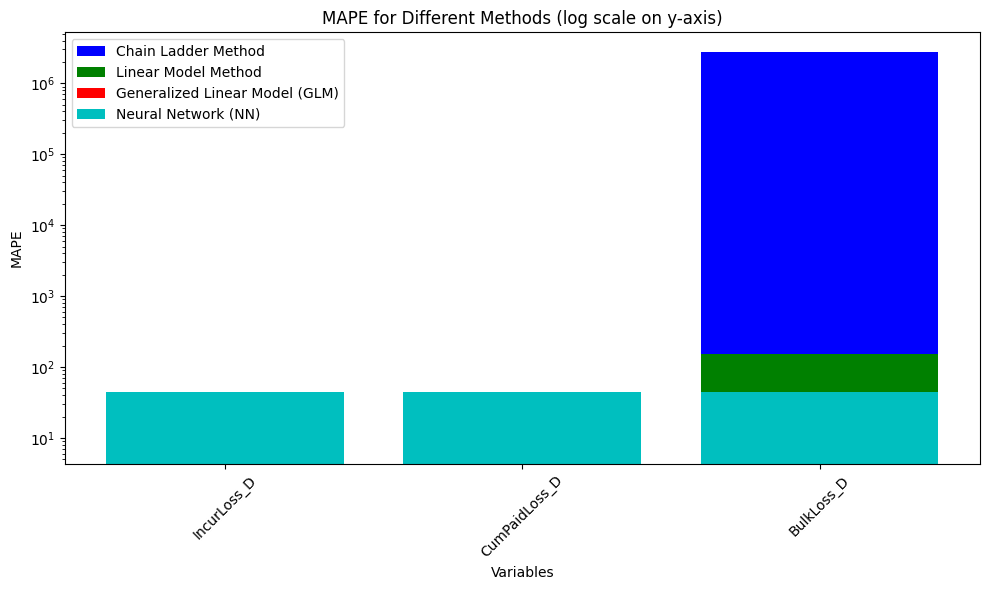

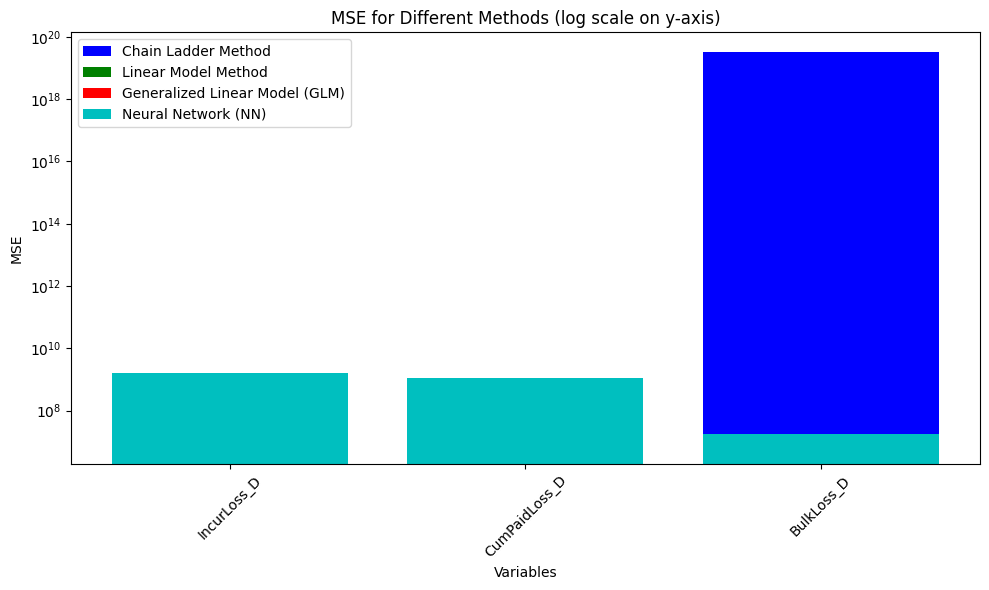

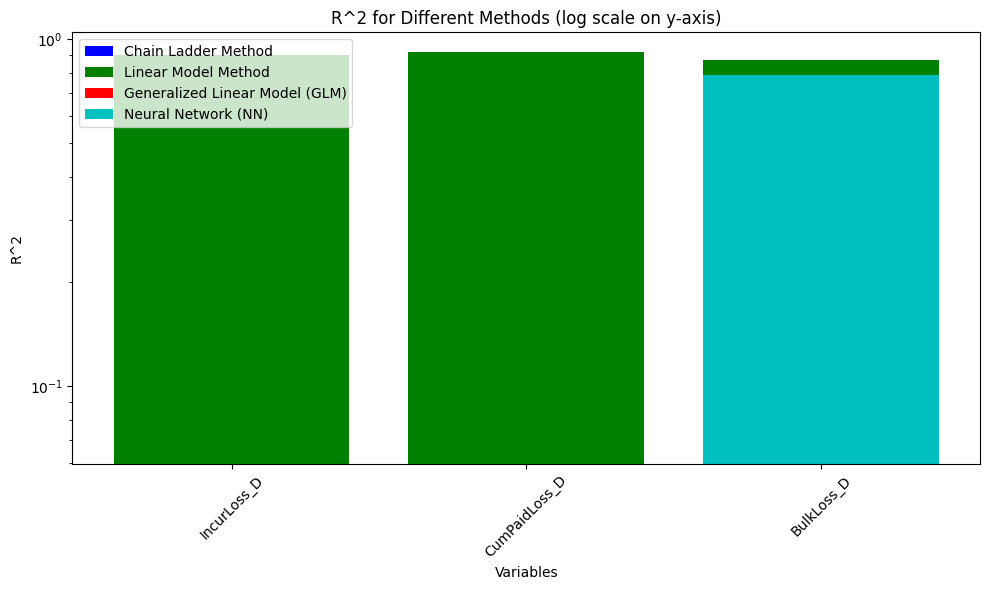

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Define error calculation functions (MAPE, MSE, and R^2)
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    actual = np.where(actual == 0, np.finfo(float).eps, actual)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean((actual - predicted) ** 2)

def calculate_r2(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    mean_actual = np.mean(actual)
    total_sum_of_squares = np.sum((actual - mean_actual) ** 2)
    residual_sum_of_squares = np.sum((actual - predicted) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared

def calculate_errors_for_all_variables(data_complete, predicted_data, error_func):
    errors = {"MAPE": {}, "MSE": {}, "R^2": {}}
    for variable in data_complete.keys():
        errors["MAPE"][variable] = []
        errors["MSE"][variable] = []
        errors["R^2"][variable] = []
        for actual_df, predicted_df in zip(data_complete[variable], predicted_data[variable]):
            actual_values = actual_df.values
            predicted_values = predicted_df.values
            mape_error = calculate_mape(actual_values, predicted_values)
            mse_error = calculate_mse(actual_values, predicted_values)
            r2_error = calculate_r2(actual_values, predicted_values)
            errors["MAPE"][variable].append(mape_error)
            errors["MSE"][variable].append(mse_error)
            errors["R^2"][variable].append(r2_error)
    return errors

# Calculate errors (MAPE, MSE, and R^2) for all variables and methods
methods = ["Chain Ladder Method", "Linear Model Method", "Generalized Linear Model (GLM)", "Neural Network (NN)"]
errors = {"MAPE": {}, "MSE": {}, "R^2": {}}

for method, triangles in zip(methods, [Triangles_C_CL, Triangles_C_LM, Triangles_C_GLM, Triangles_C_NN]):
    all_errors = calculate_errors_for_all_variables(DataComplete, triangles, calculate_mape)
    errors["MAPE"][method] = all_errors["MAPE"]
    errors["MSE"][method] = all_errors["MSE"]
    errors["R^2"][method] = all_errors["R^2"]

# Create log scale bar charts for MAPE, MSE, and R^2 on the y-axis
variables = list(DataComplete.keys())
colors = ['b', 'g', 'r', 'c']  # Define custom colors for the bars

for metric in ["MAPE", "MSE", "R^2"]:
    plt.figure(figsize=(10, 6))
    for method, color in zip(methods, colors):
        average_errors = [np.mean(errors[metric][method][variable]) for variable in variables]
        plt.bar(variables, average_errors, label=method, color=color)
    plt.xlabel("Variables")
    plt.ylabel(metric)
    plt.title(f"{metric} for Different Methods (log scale on y-axis)")
    plt.legend()
    plt.xticks(rotation=45)
    plt.yscale('log')  # Set y-axis to log scale
    plt.tight_layout()
    plt.show()